In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\pundi\\OneDrive\\Desktop\\FINAL_TF2_FILES (1)\\TF_2_Notebooks_and_Data\\DATA\\RSCCASN.csv',parse_dates=True,index_col='DATE')

In [6]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [8]:
df.columns = ['Sales']

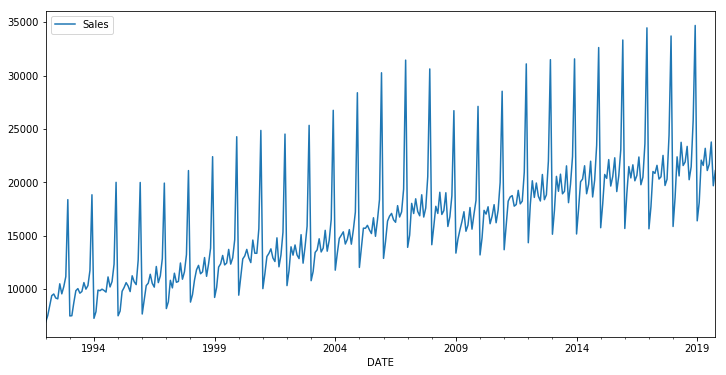

In [11]:
df.plot(figsize=(12,6))

In [10]:
len(df)

334

In [12]:
#finding forecast for 18 months i.e 1 and a half year
train_index = len(df)-18

train = df[:train_index]
test = df[train_index:]

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
1992-06-01,9182
1992-07-01,9103
1992-08-01,10513
1992-09-01,9573


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [16]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [17]:
X,y = generator[0]

In [18]:
scaled_train[12]

array([0.02047633])

In [21]:
y

array([[0.02047633]])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [24]:
n_features = 1

In [26]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [34]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [35]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0067 - val_loss: 8.2572e-04
Epoch 2/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0027 - val_loss: 7.0328e-04
Epoch 3/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0023 - val_loss: 8.3822e-04
Epoch 4/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 5/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0012 - val_loss: 6.3072e-04
Epoch 6/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 7/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 8/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0019 - val_loss: 6.6453e-04
Epoch 9/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0016 - val_loss: 9.4501e-04
Epoch 10/20
304/304 [==============================] - 4s 14ms/step

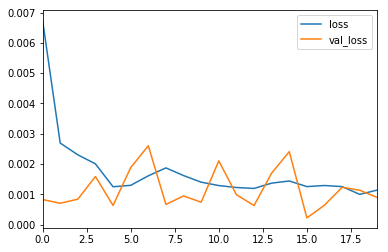

In [36]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [41]:
test_predictions = scaler.inverse_transform(test_predictions)

In [43]:
len(test_predictions) 

18

In [45]:
test['LSTM_pred'] = test_predictions

C:\Users\pundi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


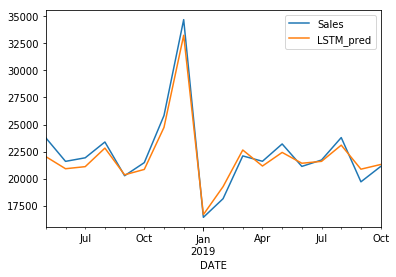

In [47]:
test.plot()

In [48]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [49]:
length = 12
generator =TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [50]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [51]:
model.fit_generator(generator,epochs=10)

Epoch 1/10
322/322 [==============================] - 5s 17ms/step - loss: 0.0271
Epoch 2/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0177
Epoch 3/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0109
Epoch 4/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0064
Epoch 5/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0038
Epoch 6/10
322/322 [==============================] - 4s 11ms/step - loss: 0.0025
Epoch 7/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0018
Epoch 8/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0019
Epoch 9/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0014
Epoch 10/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0012


In [52]:
losses = pd.DataFrame(model.history.history)

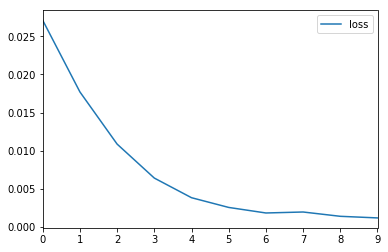

In [53]:
losses.plot()

In [54]:
forecast = []
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [55]:
forecast = scaler.inverse_transform(forecast)

In [56]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                              freq="MS")

In [57]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

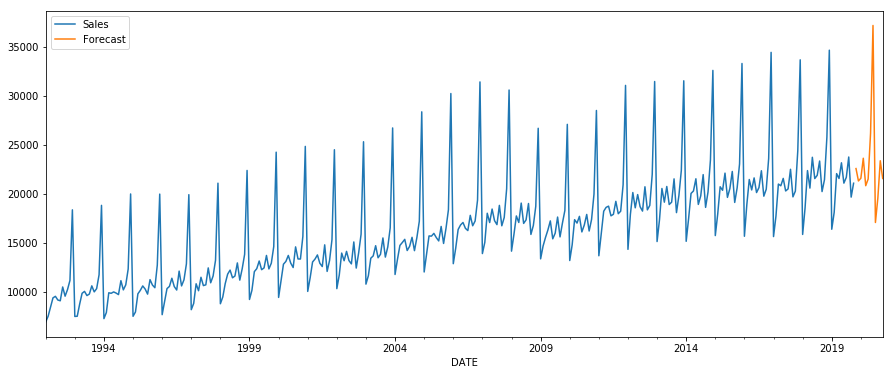

In [63]:
ax = df.plot()
forecast_df.plot(ax=ax,figsize=(15,6))

(576, 611)

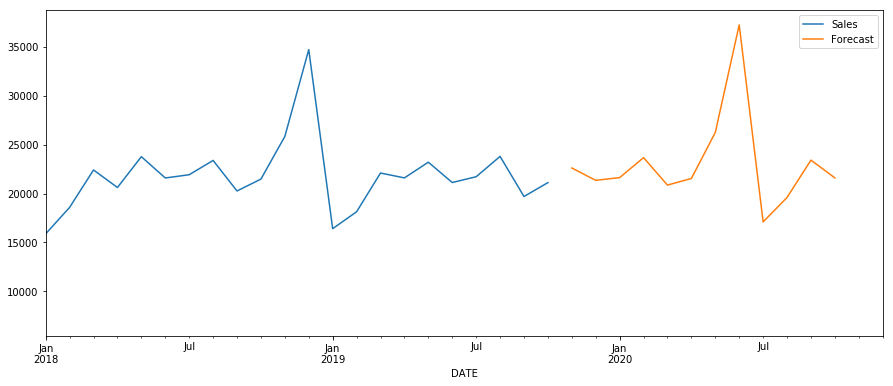

In [62]:
ax = df.plot()
forecast_df.plot(ax=ax,figsize=(15,6))
plt.xlim('2018-01-01','2020-12-01')